In [1]:
!pip install -q kagglehub pandas numpy matplotlib seaborn scikit-learn

# Kelompok ThreeMasKentir
Nama anggota:
- Bayu Satrio Wibowo
- Fathan Fardian Sanum
- Syahdan Rizqi Ruhendy

Sumber dataset yang diambil https://www.kaggle.com/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada

## Import Library & Tools.
Disini kita akan mengimport semua library & tools yang akan kita gunakan untuk mengolah dan memprediksi `status_pinjaman`

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parthpatel2130/realistic-loan-approval-dataset-us-and-canada")

print("Path to dataset files:", path)

c:\Users\ruhen\anaconda3\envs\adikara\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ruhen\.cache\kagglehub\datasets\parthpatel2130\realistic-loan-approval-dataset-us-and-canada\versions\1


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# algoritma machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [4]:
df = pd.read_csv(os.path.join(path, 'Loan_approval_data_2025.csv'))

df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


Menghapus `customer_id` karena kolom tersebut tidak memberikan informasi.

---



In [5]:
df.drop(columns=['customer_id'], inplace=True)

df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_'))

df.columns.tolist()


['age',
 'occupation_status',
 'years_employed',
 'annual_income',
 'credit_score',
 'credit_history_years',
 'savings_assets',
 'current_debt',
 'defaults_on_file',
 'delinquencies_last_2yrs',
 'derogatory_marks',
 'product_type',
 'loan_intent',
 'loan_amount',
 'interest_rate',
 'debt_to_income_ratio',
 'loan_to_income_ratio',
 'payment_to_income_ratio',
 'loan_status']

Cek data duplikat dan missing values

In [6]:
print(f'Duplicate data: {df.duplicated().sum()}')
print(f'Missing values (total sel kosong): {df.isna().sum().sum()}')

missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate


Duplicate data: 0
Missing values (total sel kosong): 0


age                        0.0
occupation_status          0.0
years_employed             0.0
annual_income              0.0
credit_score               0.0
credit_history_years       0.0
savings_assets             0.0
current_debt               0.0
defaults_on_file           0.0
delinquencies_last_2yrs    0.0
derogatory_marks           0.0
product_type               0.0
loan_intent                0.0
loan_amount                0.0
interest_rate              0.0
debt_to_income_ratio       0.0
loan_to_income_ratio       0.0
payment_to_income_ratio    0.0
loan_status                0.0
dtype: float64

Disini terlihat ada **0** missing value, berarti tidak ada missing value pada data tersebut.

In [7]:
df.isna().mean()

age                        0.0
occupation_status          0.0
years_employed             0.0
annual_income              0.0
credit_score               0.0
credit_history_years       0.0
savings_assets             0.0
current_debt               0.0
defaults_on_file           0.0
delinquencies_last_2yrs    0.0
derogatory_marks           0.0
product_type               0.0
loan_intent                0.0
loan_amount                0.0
interest_rate              0.0
debt_to_income_ratio       0.0
loan_to_income_ratio       0.0
payment_to_income_ratio    0.0
loan_status                0.0
dtype: float64

Berdasarkan hasil pengecekan kualitas data menggunakan isna().sum() / isnull().sum(), dataset tidak memiliki missing value (missing = 0) pada seluruh kolom. Oleh karena itu, tidak diperlukan proses imputasi maupun penghapusan baris terkait missing value, dan data dapat langsung dilanjutkan ke tahap preprocessing berikutnya (encoding/normalisasi) untuk pelatihan model.

Selain itu, dilakukan pengecekan nilai kosong berupa string (mis. "" atau " "), dan tidak ditemukan nilai kosong yang memengaruhi proses analisis.

In [8]:
print(f"Duplicate data: {df.duplicated().sum()}")
print(f"Missing values (total sel kosong): {df.isna().sum().sum()}")

missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate


Duplicate data: 0
Missing values (total sel kosong): 0


age                        0.0
occupation_status          0.0
years_employed             0.0
annual_income              0.0
credit_score               0.0
credit_history_years       0.0
savings_assets             0.0
current_debt               0.0
defaults_on_file           0.0
delinquencies_last_2yrs    0.0
derogatory_marks           0.0
product_type               0.0
loan_intent                0.0
loan_amount                0.0
interest_rate              0.0
debt_to_income_ratio       0.0
loan_to_income_ratio       0.0
payment_to_income_ratio    0.0
loan_status                0.0
dtype: float64

## Eksplorasi Data
Disini kita akan mengeksplor data yang diambil.

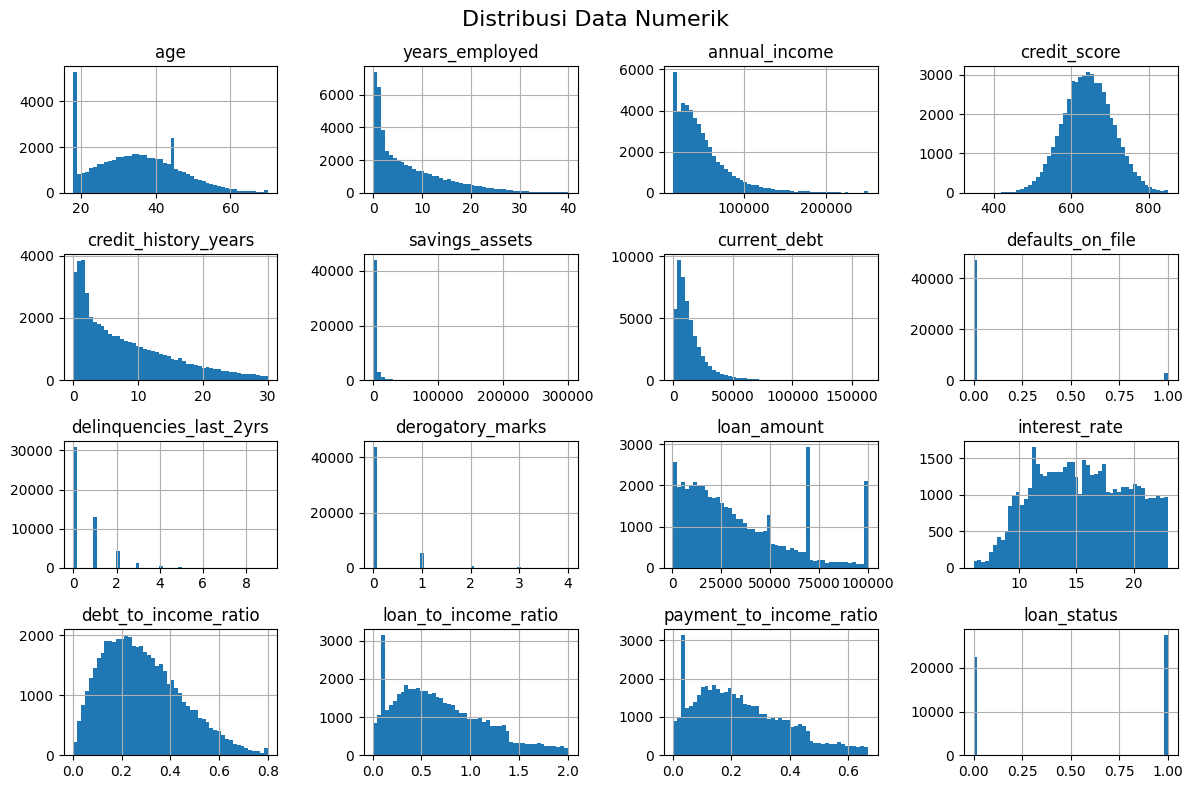

In [9]:
axes = df.hist(bins=50, figsize=(12, 8))
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik', fontsize=16)
    fig.tight_layout()
plt.show()

Dari distribusi data numerik, bisa dilihat beberapa kolom cenderung skewed atau miring, ini akan memengaruhi penggunaan model yang algoritmanya berbasis **distance-learning** dan **linear-based learning**.

Maka dari itu, kita nanti akan men-transformasi data skewed menjadi distribusi normal

In [10]:
df["loan_status"].value_counts()

loan_status
1    27523
0    22477
Name: count, dtype: int64

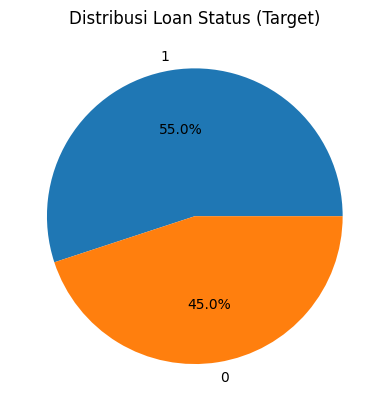

In [11]:
target_counts = df["loan_status"].value_counts()

plt.pie(target_counts, labels=target_counts.index, autopct="%1.1f%%")
plt.title("Distribusi Loan Status (Target)")
plt.show()


Dari variabel targetnya, sudah terlihat balanced. Jadi tidak perlu menghandle kasus imbalanced data

In [12]:
df.head()

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [13]:
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

# melakukan label encoding di setiap kolom kategorikal
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,0,17.2,25579,692,5.3,895,10820,0,0,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,0,7.3,43087,627,3.5,169,16550,0,1,0,2,3,53300,14.10,0.384,1.237,0.412,0
2,42,2,1.1,20840,689,8.4,17,7852,0,0,0,0,1,2100,18.33,0.377,0.101,0.034,1
3,53,2,0.5,29147,692,9.8,1480,11603,0,1,0,0,0,2900,18.74,0.398,0.099,0.033,1
4,32,0,12.5,63657,630,7.2,209,12424,0,0,0,2,2,99600,13.92,0.195,1.565,0.522,1


### Transformasi Variabel Skewed / Miring
Kita akan melakukan transformasi variabel miring agar menjadi distribusi normal / gaussian.

- annual_income
- savings_assets (sangat skewed, wajib di-transform)
- years_employed
- current_debt
- loan_amount

In [14]:
# konversi skewed ke distribusi normal menggunakan log-transformation
df['annual_income'] = np.log1p(df['annual_income'])
df['savings_assets'] = np.log1p(df['savings_assets'])
df['years_employed'] = np.log1p(df['years_employed'])
df['current_debt'] = np.log1p(df['current_debt'])
df['loan_amount'] = np.log1p(df['loan_amount'])
df['credit_history_years'] = np.log1p(df['credit_history_years'])
df['debt_to_income_ratio'] = np.log1p(df['debt_to_income_ratio'])
df['loan_to_income_ratio'] = np.log1p(df['loan_to_income_ratio'])
df['payment_to_income_ratio'] = np.log1p(df['payment_to_income_ratio'])


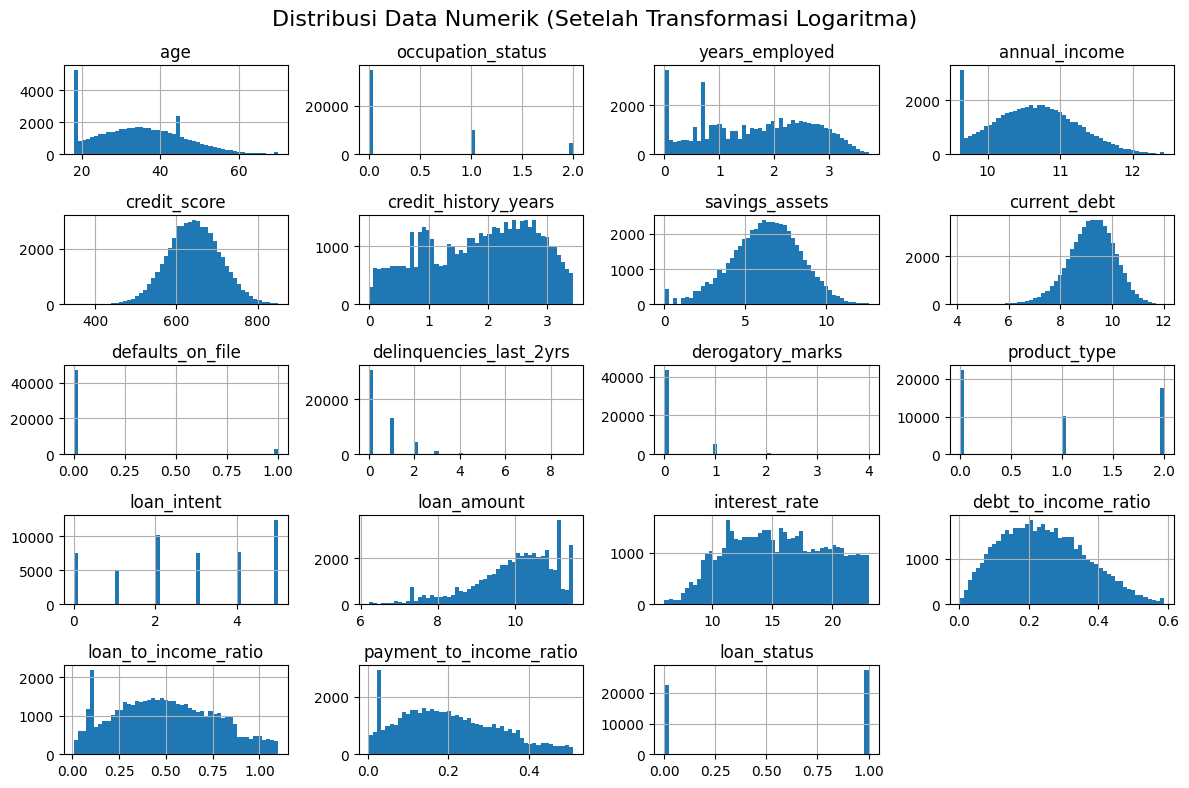

In [15]:
axes = df.hist(bins=50, figsize=(12, 8));
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik (Setelah Transformasi Logaritma)', fontsize=16);
    fig.tight_layout()

Setelah dilakukan transformasi feature data yang miring / skewed, data sudah terlihat mendekati distribusi normal. Hal ini diperlukan untuk memenuhi syarat algoritma model **distance-based learning** & **linear-based learning** terpenuhi agar hasilnya optimal.

## Pembagian Dataset (Train, Val, Test)
Disini kita akan menggunakan split train:val:test dengan proporsi 80:10:10.

In [16]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# split pertama : 70% train, 30% for val+test
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y  # stratify untuk maintain balance
)

# split kedua: 20% val, 10% test from the 30% temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=1/3,  # 1/3 of 30% is 10% of total
    random_state=42,
    stratify=y_temp  # stratify untuk maintain balance
)


## Pemodelan
Model yang akan diuji adalah:
- Linear Regression
- Logistik Regression
- Decision Tree
- K-Nearest Neighbour
- Naive Bayes
- Algoritma Genetika

In [17]:

def display_confusion_matrix(y_true, y_pred, nama_model="Model"):
    plt.figure(figsize=(6, 5))

    ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=['Rejected (0)', 'Approved (1)'],
        cmap='Blues',
        values_format='d',
        colorbar=False
    )

    plt.title(f"Confusion Matrix: {nama_model}")
    plt.grid(False)
    plt.show()


In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Linear Regression

In [19]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

y_pred_lin = (linreg_model.predict(X_val_scaled) >= 0.5).astype(int)

In [20]:
print("-" * 40)
print("HASIL EVALUASI LINEAR REGRESSION (THRESHOLD 0.5)")
print("-" * 40)
print(f'Akurasi LinReg   : {accuracy_score(y_val, y_pred_lin):.4f}')
print(f'Precision LinReg : {precision_score(y_val, y_pred_lin):.4f}')
print(f'Recall LinReg    : {recall_score(y_val, y_pred_lin):.4f}')
print("-" * 40)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_lin))

----------------------------------------
HASIL EVALUASI LINEAR REGRESSION (THRESHOLD 0.5)
----------------------------------------
Akurasi LinReg   : 0.8571
Precision LinReg : 0.8496
Recall LinReg    : 0.8997
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      4495
           1       0.85      0.90      0.87      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

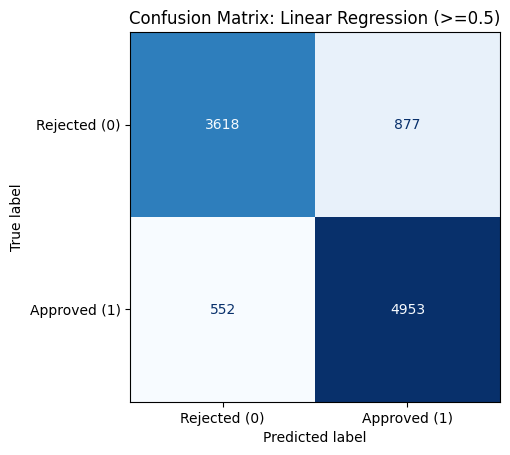

In [21]:
display_confusion_matrix(y_val, y_pred_lin, "Linear Regression (>=0.5)")

# Logistik Regression

In [22]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

grid_search_logreg = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000),
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_logreg.fit(X_train_scaled, y_train)

best_params_logreg = grid_search_logreg.best_params_
best_logreg_model = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg_model.predict(X_val_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [23]:
print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH)")
print("-" * 40)
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_logreg):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_logreg):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_logreg):.4f}')
print("-" * 40)

print("\nBest Params LogReg:", best_params_logreg)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_logreg))

----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH)
----------------------------------------
Akurasi LogReg   : 0.8625
Precision LogReg : 0.8686
Recall LogReg    : 0.8839
----------------------------------------

Best Params LogReg: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

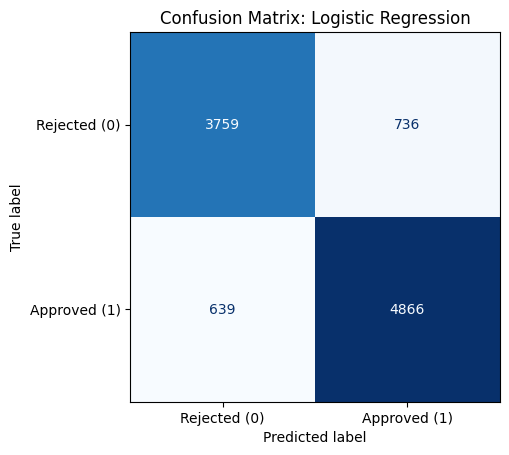

In [24]:
display_confusion_matrix(y_val, y_pred_logreg, "Logistic Regression")


# Decision Tree

In [25]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # pengukuran kualitas split
    'max_depth': [None, 5, 10, 15, 20],        # kedalaman pohon (None = sampai habis)
    'min_samples_split': [2, 5, 10],           # minimal sampel untuk membelah node
    'min_samples_leaf': [1, 2, 4]              # minimal sampel di node paling ujung (daun)
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), # random_state agar hasil konsisten
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy', # bisa diganti 'recall' jika ingin prioritaskan deteksi approved
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [26]:
print("-" * 35)
print("HASIL EVALUASI DECISION TREE")
print("-" * 35)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt):.4f}')
print("-" * 35)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt))

-----------------------------------
HASIL EVALUASI DECISION TREE
-----------------------------------
Akurasi DT   : 0.8880
Precision DT : 0.8865
Recall DT    : 0.9135
-----------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4495
           1       0.89      0.91      0.90      5505

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<Figure size 600x500 with 0 Axes>

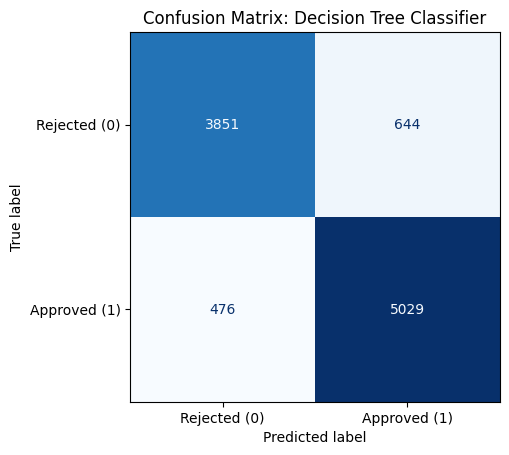

In [27]:
display_confusion_matrix(y_val, best_dt_model.predict(X_val), "Decision Tree Classifier")

# KNN

In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_scaled, y_train)

best_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

y_pred_knn = best_knn_model.predict(X_val_scaled)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [29]:
print("-" * 30)
print("HASIL EVALUASI KNN (GRID SEARCH)")
print("-" * 30)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn):.4f}')
print("-" * 30)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn))

------------------------------
HASIL EVALUASI KNN (GRID SEARCH)
------------------------------
Akurasi KNN   : 0.8602
Precision KNN : 0.8297
Recall KNN    : 0.9388
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      4495
           1       0.83      0.94      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.87      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

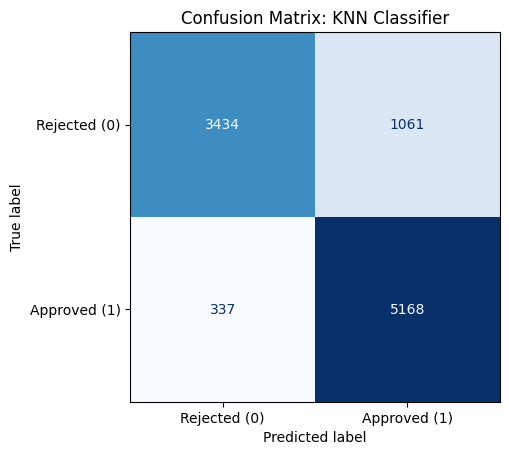

In [30]:
display_confusion_matrix(y_val, y_pred_knn, "KNN Classifier")

# Naive Bayes

In [31]:
param_grid_nb = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

grid_search_nb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_nb.fit(X_train, y_train)

best_params_nb = grid_search_nb.best_params_
best_nb_model = grid_search_nb.best_estimator_

y_pred_nb = best_nb_model.predict(X_val)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [32]:
print("-" * 35)
print("HASIL EVALUASI NAIVE BAYES (GRID SEARCH)")
print("-" * 35)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_nb):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_nb):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_nb):.4f}')
print("-" * 35)

print("\nBest Params NB:", best_params_nb)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_nb))

-----------------------------------
HASIL EVALUASI NAIVE BAYES (GRID SEARCH)
-----------------------------------
Akurasi NB   : 0.7892
Precision NB : 0.7461
Recall NB    : 0.9355
-----------------------------------

Best Params NB: {'var_smoothing': np.float64(1e-06)}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      4495
           1       0.75      0.94      0.83      5505

    accuracy                           0.79     10000
   macro avg       0.82      0.77      0.78     10000
weighted avg       0.81      0.79      0.78     10000



<Figure size 600x500 with 0 Axes>

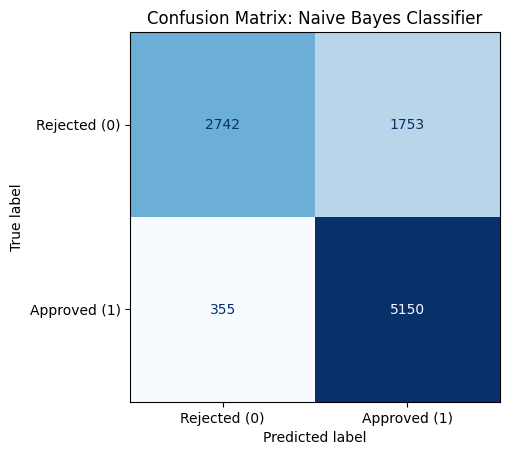

In [33]:
display_confusion_matrix(y_val, y_pred_nb, "Naive Bayes Classifier")

# Algoritma Genetika

In [ ]:
neighbors_space = list(range(3, 31, 2))  # lebih halus
weights_space = ['uniform', 'distance']
metric_space = ['euclidean']  # cukup, jangan buang waktu

def make_individual():
    return {
        "n_neighbors": random.choice(neighbors_space),
        "weights": random.choice(weights_space),
        "metric": random.choice(metric_space)
    }

f1_scorer = make_scorer(f1_score)

def fitness(ind):
    model = KNeighborsClassifier(
        n_neighbors=ind["n_neighbors"],
        weights=ind["weights"],
        metric=ind["metric"]
    )
    scores = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        cv=5,
        scoring=f1_scorer
    )
    return scores.mean()

def crossover(p1, p2):
    return {
        key: p1[key] if random.random() < 0.5 else p2[key]
        for key in p1
    }

def mutate(ind, mut_rate=0.3):
    if random.random() < mut_rate:
        ind["n_neighbors"] = random.choice(
            [x for x in neighbors_space if x != ind["n_neighbors"]]
        )
    if random.random() < mut_rate:
        ind["weights"] = (
            'distance' if ind["weights"] == 'uniform' else 'uniform'
        )
    return ind

def select_parent(scored):
    fitnesses = np.array([f for f, _ in scored])
    probs = fitnesses / fitnesses.sum()
    return np.random.choice(
        [ind for _, ind in scored],
        p=probs
    )

pop_size = 20
generations = 15
elite_size = 2
mut_rate = 0.3

population = [make_individual() for _ in range(pop_size)]

for gen in range(generations):
    scored = [(fitness(ind), ind) for ind in population]
    scored.sort(reverse=True, key=lambda x: x[0])

    best_score, best_ind = scored[0]
    avg_score = np.mean([f for f, _ in scored])

    print(
        f"Gen {gen+1}/{generations} | "
        f"Best F1: {best_score:.4f} | "
        f"Avg F1: {avg_score:.4f} | "
        f"Params: {best_ind}"
    )

    # elitism
    new_pop = [ind.copy() for _, ind in scored[:elite_size]]

    while len(new_pop) < pop_size:
        p1 = select_parent(scored)
        p2 = select_parent(scored)
        child = crossover(p1, p2)
        child = mutate(child, mut_rate)
        new_pop.append(child)

    population = new_pop

final_scored = [(fitness(ind), ind) for ind in population]
final_scored.sort(reverse=True, key=lambda x: x[0])

best_f1_ga, best_params_ga = final_scored[0]

Gen 1/10 | Best Acc: 0.8599 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'euclidean'}
Gen 2/10 | Best Acc: 0.8606 | Params: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean'}
Gen 3/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 4/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 5/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 6/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 7/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 8/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 9/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 10/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weig

In [ ]:
print("\n" + "-" * 40)
print("HASIL OPTIMASI GA")
print("-" * 40)
print("Best Params GA:", best_params_ga)
print(f"Best Val Accuracy: {best_acc_ga:.4f}")
print("-" * 40)

# train model terbaik dari GA dan evaluasi (seperti model lain)
best_knn_ga = KNeighborsClassifier(**best_params_ga)
best_knn_ga.fit(X_train_scaled, y_train)
y_pred_ga = best_knn_ga.predict(X_val_scaled)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_ga))


----------------------------------------
HASIL OPTIMASI GA
----------------------------------------
Best Params GA: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Best Val Accuracy: 0.8609
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4495
           1       0.83      0.94      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.87      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

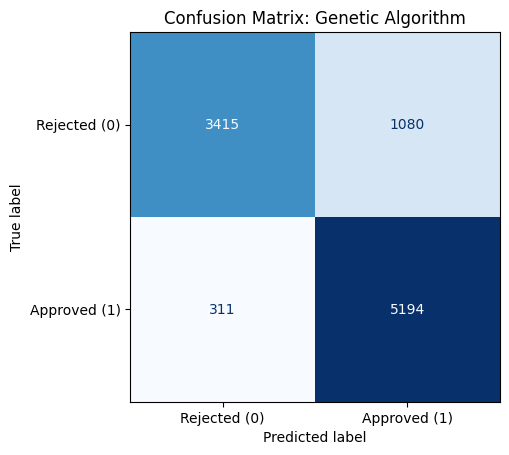

In [ ]:
display_confusion_matrix(y_val, y_pred_ga, "Genetic Algorithm")

## Evaluasi di data test

# Linear Regression

In [37]:
test_preds_lin = (linreg_model.predict(X_test_scaled) >= 0.5).astype(int)

print(f'Akurasi Linear Regression : {accuracy_score(y_test, test_preds_lin):.4f}')
print(f'Precision Linear Regression : {precision_score(y_test, test_preds_lin):.4f}')
print(f'Recall Linear Regression : {recall_score(y_test, test_preds_lin):.4f}')


Akurasi Linear Regression : 0.8506
Precision Linear Regression : 0.8430
Recall Linear Regression : 0.8953


<Figure size 600x500 with 0 Axes>

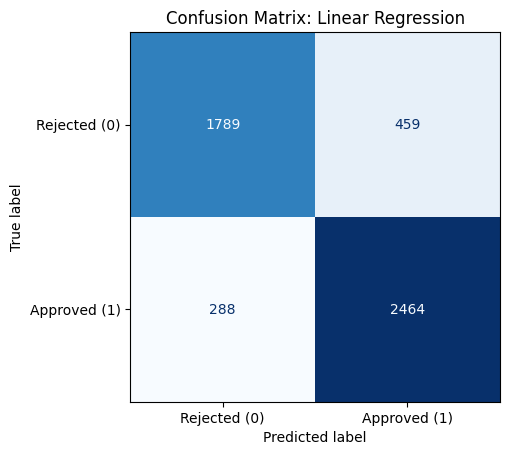

In [38]:
display_confusion_matrix(y_test, test_preds_lin, "Linear Regression")


# Logistic Regression

In [39]:
test_preds_logreg = best_logreg_model.predict(X_test_scaled)

print(f'Akurasi Logistic Regression : {accuracy_score(y_test, test_preds_logreg):.4f}')
print(f'Precision Logistic Regression : {precision_score(y_test, test_preds_logreg):.4f}')
print(f'Recall Logistic Regression : {recall_score(y_test, test_preds_logreg):.4f}')

Akurasi Logistic Regression : 0.8550
Precision Logistic Regression : 0.8590
Recall Logistic Regression : 0.8812


<Figure size 600x500 with 0 Axes>

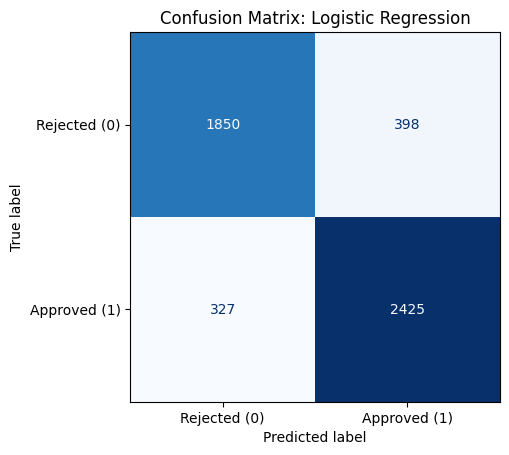

In [40]:
display_confusion_matrix(y_test, best_logreg_model.predict(X_test_scaled), "Logistic Regression")


# Decision Tree

In [41]:
test_preds_dt = best_dt_model.predict(X_test)

print(f'Akurasi DT : {accuracy_score(y_test, test_preds_dt):.4f}')
print(f'Precision DT : {precision_score(y_test, test_preds_dt):.4f}')
print(f'Recall DT : {recall_score(y_test, test_preds_dt):.4f}')

Akurasi DT : 0.8842
Precision DT : 0.8827
Recall DT : 0.9106


<Figure size 600x500 with 0 Axes>

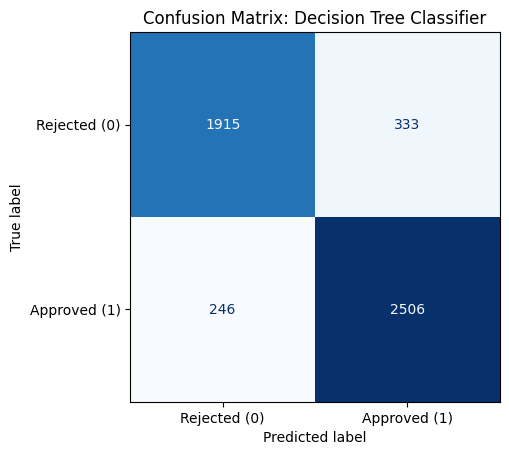

In [42]:
display_confusion_matrix(y_test, best_dt_model.predict(X_test), "Decision Tree Classifier")

# KNN

In [43]:
test_preds_knn = best_knn_model.predict(X_test)

print(f'Akurasi KNN   : {accuracy_score(y_test, test_preds_knn):.4f}')
print(f'Precision KNN : {precision_score(y_test, test_preds_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_test, test_preds_knn):.4f}')

Akurasi KNN   : 0.6028
Precision KNN : 0.5808
Recall KNN    : 1.0000


<Figure size 600x500 with 0 Axes>

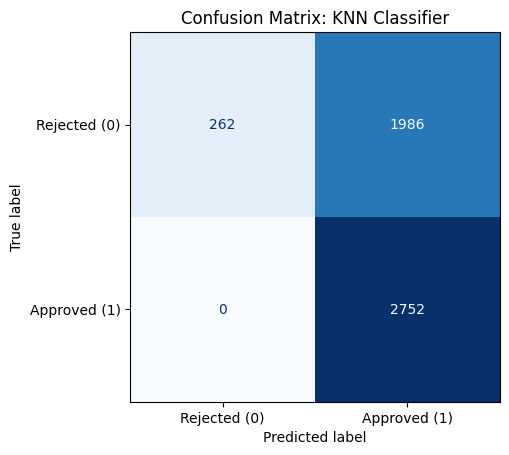

In [44]:
display_confusion_matrix(y_test, best_knn_model.predict(X_test), "KNN Classifier")

# Naive Bayes

In [45]:
test_preds_nb = best_nb_model.predict(X_test)

print(f'Akurasi Naive Bayes: {accuracy_score(y_test, test_preds_nb):.4f}')
print(f'Precision Naive Bayes: {precision_score(y_test, test_preds_nb):.4f}')
print(f'Recall Naive Bayes: {recall_score(y_test, test_preds_nb):.4f}')

Akurasi Naive Bayes: 0.7708
Precision Naive Bayes: 0.7280
Recall Naive Bayes: 0.9317


<Figure size 600x500 with 0 Axes>

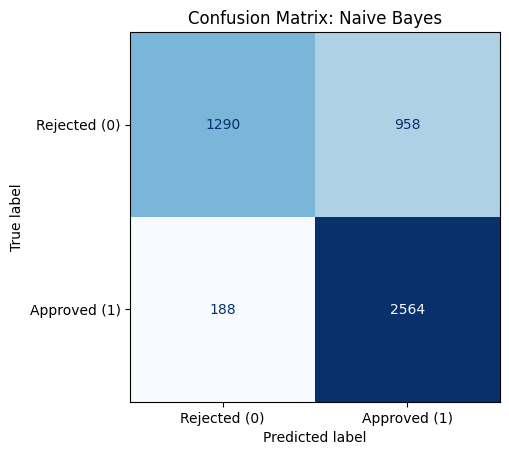

In [46]:
display_confusion_matrix(y_test, best_nb_model.predict(X_test), "Naive Bayes")

# Algoritma Genetika

In [47]:
test_preds_ga = best_knn_ga.predict(X_test_scaled)

print(f'Akurasi GA : {accuracy_score(y_test, test_preds_ga):.4f}')
print(f'Precision GA : {precision_score(y_test, test_preds_ga):.4f}')
print(f'Recall GA : {recall_score(y_test, test_preds_ga):.4f}')

Akurasi GA : 0.8566
Precision GA : 0.8248
Recall GA : 0.9390


<Figure size 600x500 with 0 Axes>

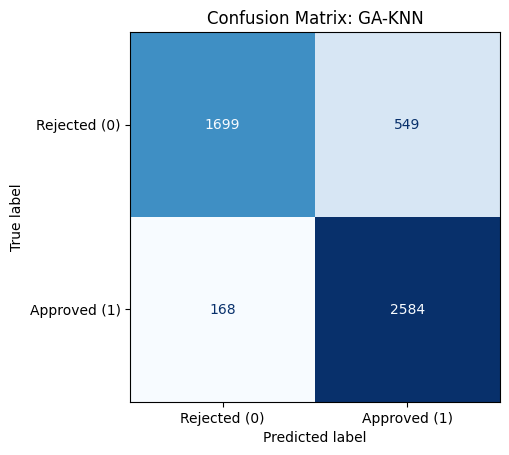

In [48]:
display_confusion_matrix(y_test, best_knn_ga.predict(X_test_scaled), "GA-KNN")


## Kesimpulan

1. **RINGKASAN DATA & PREPROCESSING**

   * Dataset yang digunakan adalah *Loan_approval_data_2025.csv* (Kaggle “realistic-loan-approval-dataset-us-and-canada”), dan kolom `customer_id` dihapus karena tidak informatif.  
   * Kualitas data: **tidak ada duplikasi** dan **tidak ada missing value**.
   * Target `loan_status` cukup **balanced** (kelas 1 = 27.523, kelas 0 = 22.477), jadi tidak dilakukan resampling (mis. SMOTE).
   * Encoding kategori dilakukan dengan **LabelEncoder** untuk `occupation_status`, `product_type`, `loan_intent`.
   * Transformasi **log (np.log1p)** diterapkan pada fitur yang skewed seperti `annual_income`, `savings_assets`, `years_employed`, `current_debt`, `loan_amount`, dan beberapa rasio agar lebih mendekati normal.
   * Pembagian data: **70% train**, **20% validation**, **10% test**, memakai `stratify` agar komposisi kelas tetap seimbang.
   * Scaling **MinMaxScaler** dipakai untuk model yang sensitif skala (Linear/Logistic/KNN/GA).

2. **EVALUASI MODEL (DATA TEST)**
   Model yang diuji: Linear Regression (threshold 0.5), Logistic Regression (GridSearch), Decision Tree (GridSearch), KNN (GridSearch), Naive Bayes (GridSearch), dan Algoritma Genetika (optimasi KNN).

   A. **Linear Regression (>= 0.5)**

   * Akurasi: **0.8506** | Precision: **0.8430** | Recall: **0.8953**

   B. **Logistic Regression (Grid Search)**

   * Akurasi: **0.8550** | Precision: **0.8590** | Recall: **0.8812**

   C. **Decision Tree (MODEL TERBAIK)**

   * Akurasi: **0.8842** | Precision: **0.8827** | Recall: **0.9106**
   * Catatan: performanya paling “seimbang” dan metrik tertinggi di data test dibanding model lain yang kamu jalankan.

   D. **KNN (Grid Search)**

   * Akurasi: **0.6028** | Precision: **0.5808** | Recall: **1.0000**
   * Catatan penting: di bagian test, prediksi KNN dilakukan ke `X_test` (bukan `X_test_scaled`)  sehingga hasilnya bisa tidak merepresentasikan performa KNN yang sebenarnya (karena KNN sangat sensitif skala fitur).

   E. **Naive Bayes (Grid Search)**

   * Akurasi: **0.7708** | Precision: **0.7280** | Recall: **0.9317**

   F. **Algoritma Genetika (GA-KNN)**

   * Akurasi: **0.8570** | Precision: **0.8299** | Recall: **0.9310**

3. **ANALISIS CONFUSION MATRIX (DECISION TREE – DATA TEST)**
   Dari confusion matrix *Decision Tree Classifier* di data test:  

   * **True Negative (Rejected → Rejected)** = **1.915**
   * **False Positive (Rejected → Approved)** = **333**
   * **False Negative (Approved → Rejected)** = **246**
   * **True Positive (Approved → Approved)** = **2.506**
     Interpretasi singkat: jumlah salah prediksi “Approved padahal seharusnya Rejected” (FP=333) dan “Rejected padahal seharusnya Approved” (FN=246) relatif kecil dibanding prediksi benar, sehingga akurasi dan recall-nya tinggi.

4. **REKOMENDASI**
   Berdasarkan evaluasi test yang kamu jalankan, model **Decision Tree** paling layak dijadikan kandidat utama karena metriknya paling tinggi dan stabil (akurasi 0.8842 dan recall 0.9106).
   Untuk konteks bisnis pinjaman: kalau fokus kamu adalah “mengurangi risiko salah approve”, kamu bisa lanjutkan dengan:

   * Mengubah `scoring` saat tuning (mis. fokus ke precision kelas Approved atau cost-sensitive), dan/atau
   * Mengatur threshold/aturan keputusan (khususnya untuk model probabilistik), supaya FP bisa ditekan sesuai kebijakan risiko bank.
